In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

Let's build the most basic multiple regression model so that it can serve as a baseline for more complex models later on.

In [2]:
df_clean = pd.read_csv('ML_data_2023-03-07.csv')
results = {
    'Comment':[],
    'intercept':[],
    'MAE':[],
    'MSE':[],
    'RMSE':[],
    'R-squared':[],
    'Baseline_example':[]
    }

In [3]:
#input=[('scale',StandardScaler()),('model',LinearRegression())]
#pipe = Pipeline(input)
def create_LR(X, Y, comment):
    lm = LinearRegression()
    lm.fit(X, Y)
    Yhat = lm.predict(X)
    ax1=sns.kdeplot(Y, color='red')
    sns.kdeplot(Yhat, color='blue', ax=ax1).set(title='Distribution of Y (red) vs. Y-hat (blue)')
    plt.subplots(1)
    sns.regplot(x=Yhat, y=Y).set(title='Scatter of real vs. predicted values')
    

    #predicting the price of a Golf manufactured in 2020, 100k km, 1.4, 120HP, 5 l/100, from a private person, Diesel, manual, from Poland and registered in Poland
    example = [2020, 100000, 1400, 120, 5, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1]
    try:
        df_example = pd.DataFrame(example,X.columns,columns=['Example'])
    except:
        example = [2020, 100000, 1400, 120, 5, 0, 0, 1] #cheaty but I can't be bothered to program it to handle fewer values nicely
        df_example = pd.DataFrame(example,X.columns,columns=['Example'])
                    
    
    results['intercept'].append(lm.intercept_)
    results['MAE'].append(mean_absolute_error(Y, Yhat))
    results['MSE'].append(mean_squared_error(Y, Yhat))
    results['RMSE'].append(np.sqrt(mean_squared_error(Y, Yhat)))
    results['R-squared'].append(lm.score(X, Y))               
    results['Baseline_example'].append(lm.predict(df_example.T))  
    results['Comment'].append(comment)               
    
                           
                  
    print('Intercept:', results['intercept'][-1])
    print("MAE:", results['MAE'][-1])
    print('MSE:', results['MSE'][-1])
    print('RMSE:', results['RMSE'][-1])
    print('R-squared:', results['R-squared'][-1])                         
    print('Predicted price:', results['Baseline_example'][-1])

    coef = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
    print(coef)

Intercept: -4942474.820488726
MAE: 9623.151549125427
MSE: 175809004.24860513
RMSE: 13259.29878419689
R-squared: 0.8747473677755645
Predicted price: [67046.69534908]
                              Coefficient
Rok produkcji                 2470.796402
Przebieg                        -0.189977
Pojemność skokowa               31.715828
Moc                            131.110041
Spalanie W Mieście           -2119.557001
Oferta od_Firmy               1448.442574
Oferta od_Osoby prywatnej    -1448.442574
Rodzaj paliwa_Benzyna         6524.208343
Rodzaj paliwa_Diesel         -6524.208343
Skrzynia biegów_Automatyczna  5041.000193
Skrzynia biegów_Manualna     -5041.000193
Kraj pochodzenia_Inne          -50.228913
Kraj pochodzenia_Niemcy      -2290.449419
Kraj pochodzenia_Polska       2340.678332
Zarejestrowany w Polsce_Nie   1354.151882
Zarejestrowany w Polsce_Tak  -1354.151882


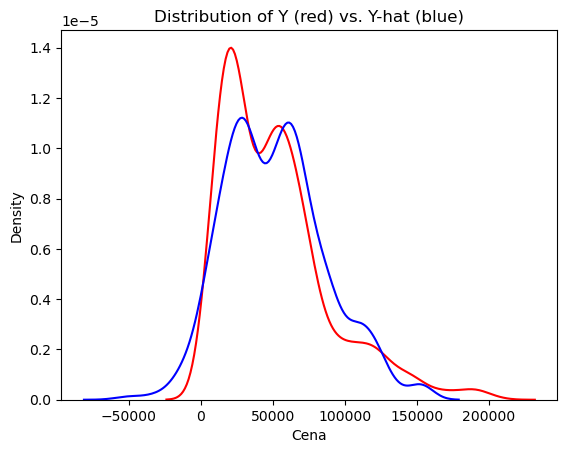

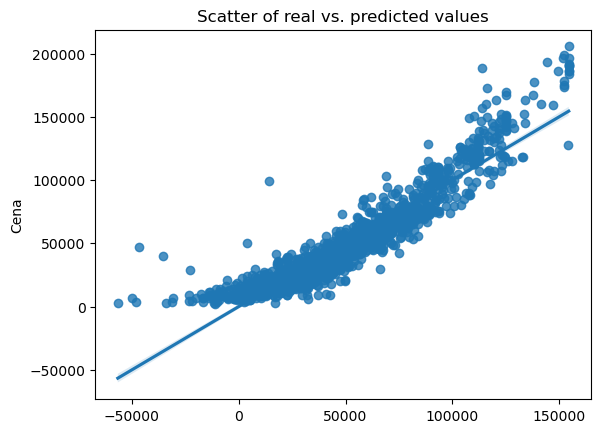

In [4]:
df = df_clean.copy()
Y = df.pop('Cena')
X = df
create_LR(X, Y, 'Everything')

Intercept: -9971156.794688521
MAE: 8461.094662392117
MSE: 123638800.58863887
RMSE: 11119.298565495887
R-squared: 0.9000711692790488
Predicted price: [73499.80939706]
                              Coefficient
Rok produkcji                 4961.118761
Przebieg                        -0.145494
Pojemność skokowa               23.316064
Moc                            194.462754
Spalanie W Mieście            -988.574145
Oferta od_Firmy                337.567445
Oferta od_Osoby prywatnej     -337.567445
Rodzaj paliwa_Benzyna         5131.285063
Rodzaj paliwa_Diesel         -5131.285063
Skrzynia biegów_Automatyczna  4036.767854
Skrzynia biegów_Manualna     -4036.767854
Kraj pochodzenia_Inne          719.980928
Kraj pochodzenia_Niemcy        445.686085
Kraj pochodzenia_Polska      -1165.667014
Zarejestrowany w Polsce_Nie   2617.789378
Zarejestrowany w Polsce_Tak  -2617.789378


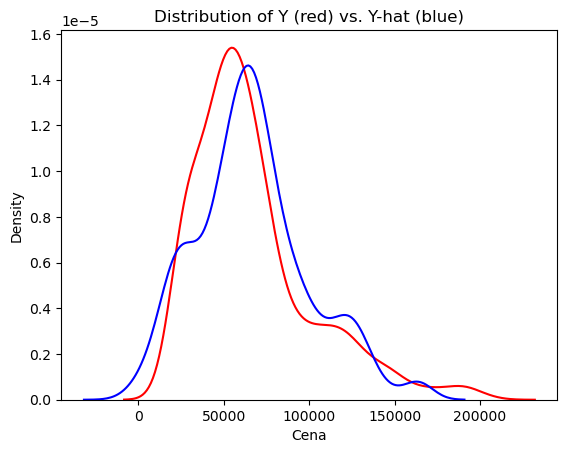

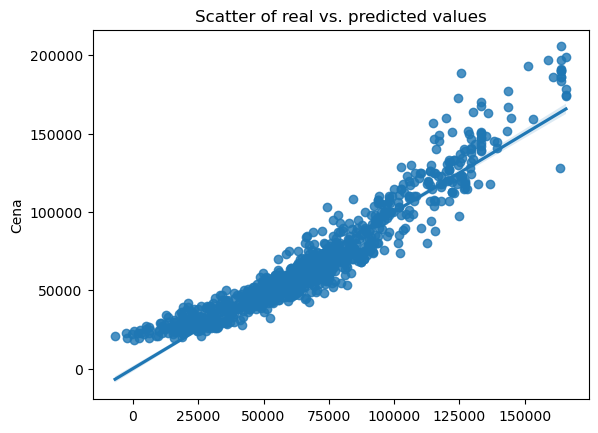

In [5]:
df = df_clean.copy()
df = df[df['Rok produkcji'] >= 2010]

Y = df.pop('Cena')
X = df
create_LR(X, Y, 'Produced after 2010')

Intercept: -4451020.662787172
MAE: 10211.712252295903
MSE: 204095668.59342623
RMSE: 14286.20553518065
R-squared: 0.854594934848819
Predicted price: [77951.97213954]
                         Coefficient
Rok produkcji            2227.186716
Przebieg                   -0.219981
Pojemność skokowa          15.405210
Moc                       255.337429
Spalanie W Mieście       -316.862119
Kraj pochodzenia_Inne    -285.042255
Kraj pochodzenia_Niemcy -1145.027505
Kraj pochodzenia_Polska  1430.069759


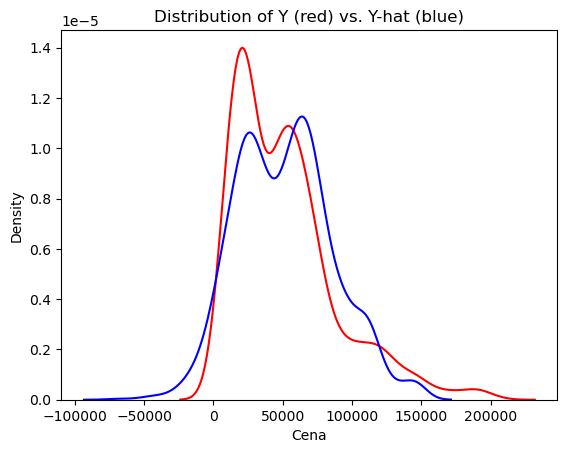

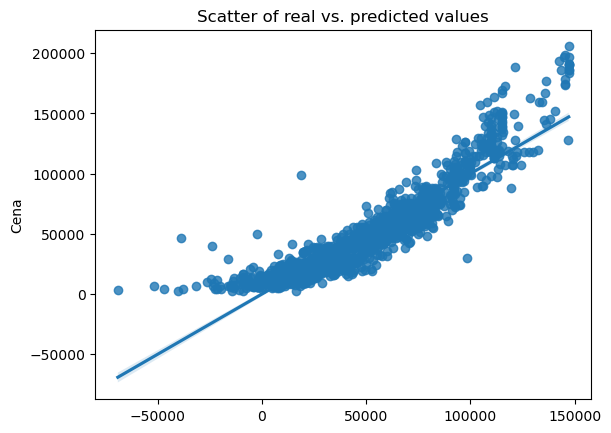

In [6]:
df = df_clean.copy()
df = df[['Rok produkcji', 'Przebieg', 'Pojemność skokowa', 'Moc',
       'Spalanie W Mieście', 'Cena', 'Kraj pochodzenia_Inne',
       'Kraj pochodzenia_Niemcy', 'Kraj pochodzenia_Polska']]


Y = df.pop('Cena')
X = df
create_LR(X, Y, 'Fewer independent variables')

In [7]:
pd.DataFrame.from_dict(results)

,Comment,intercept,MAE,MSE,RMSE,R-squared,Baseline_example
0,Everything,-4.942475e+06,9623.151549,1.758090e+08,13259.298784,0.874747,[67046.6953490777]
1,Produced after 2010,-9.971157e+06,8461.094662,1.236388e+08,11119.298565,0.900071,[73499.80939706229]
2,Fewer independent variables,-4.451021e+06,10211.712252,2.040957e+08,14286.205535,0.854595,[77951.97213954106]


In [8]:
df_clean.loc[(df_clean['Rok produkcji']==2020) & (df_clean['Przebieg']>90000) & (df_clean['Przebieg']<110000)]

,Rok produkcji,Przebieg,Pojemność skokowa,Moc,Spalanie W Mieście,Cena,Oferta od_Firmy,Oferta od_Osoby prywatnej,Rodzaj paliwa_Benzyna,Rodzaj paliwa_Diesel,Skrzynia biegów_Automatyczna,Skrzynia biegów_Manualna,Kraj pochodzenia_Inne,Kraj pochodzenia_Niemcy,Kraj pochodzenia_Polska,Zarejestrowany w Polsce_Nie,Zarejestrowany w Polsce_Tak
49,2020,98000,999.0,115.0,5.500000,55900,1,0,1,0,0,1,0,0,1,0,1
63,2020,94000,999.0,115.0,5.500000,56900,1,0,1,0,0,1,0,0,1,0,1
66,2020,91000,999.0,115.0,5.500000,57900,1,0,1,0,0,1,0,0,1,0,1
75,2020,91000,999.0,115.0,7.190940,57900,1,0,1,0,0,1,0,0,1,0,1
132,2020,96000,999.0,115.0,5.500000,55900,1,0,1,0,0,1,0,0,1,0,1
264,2020,97771,1598.0,115.0,6.164663,77900,1,0,0,1,0,1,0,1,0,0,1
790,2020,98463,999.0,110.0,7.190940,92900,1,0,1,0,1,0,0,0,1,0,1


Limiting the dataset to cars produced after 2010 seems to have given the best result. R-squared suggests that the model is able to explain upwards of 85% of variance in the dataset though the high value of MSE is problematic. This means that the chosen independent variables might not be the best for predicting the price or that the relation is not linear.

Assuming the following criteria: <br>
2020, 100k km, 1.4, 120HP, 5 l/100, from a private person, Diesel, manual, from Poland and registered in Poland <br>
and comparing to the closest real examples all the models seem to have given us a decent prediction
